In [6]:
import pandas as pd
from astropy.io import fits
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from astropy.table import Table, Column
import astroML
%matplotlib inline
import scipy
from astroML.stats import binned_statistic_2d

In [42]:
#Pandas#
#data = fits.getdata('HLC.RA_00_to_01.fits.gz', 1)
#table = pd.DataFrame(data)

def read_HLC(name):
    #Table#
    table = Table.read(name)
    
    #----filters-----#
    stars=table['MEAN_OBJECT_TYPE'] > 5 #np.where(table['MEAN_OBJECT_TYPE']>5)[0]
    raclip=np.abs(table['RA_PM_CLIP']) < 0.05
    declip=np.abs(table['DEC_PM_CLIP']) < 0.05
    m=stars*raclip*declip
    
    table=table[m]
    
    #----proper motion----#
    rapm=np.abs(table['RA_PM_CLIP'])
    decpm=np.abs(table['DEC_PM_CLIP'])
    #---colors----#
    #u=table['MEAN_PSFMAG_CLIP'][:,0]
    g=table['MEAN_PSFMAG_CLIP'][:,1]
    r=table['MEAN_PSFMAG_CLIP'][:,2]
    i=table['MEAN_PSFMAG_CLIP'][:,3]
    #z=table['MEAN_PSFMAG_CLIP'][:,4]
    
    return(rapm,decpm,g,r,i)


rapm,decpm,g,r,i= read_HLC('HLC.RA_00_to_01.fits.gz')

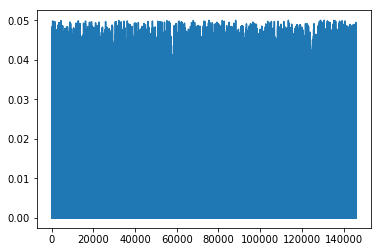

In [43]:
plt.plot(rapm)

/Users/BriBri/miniconda3/envs/astroconda36/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


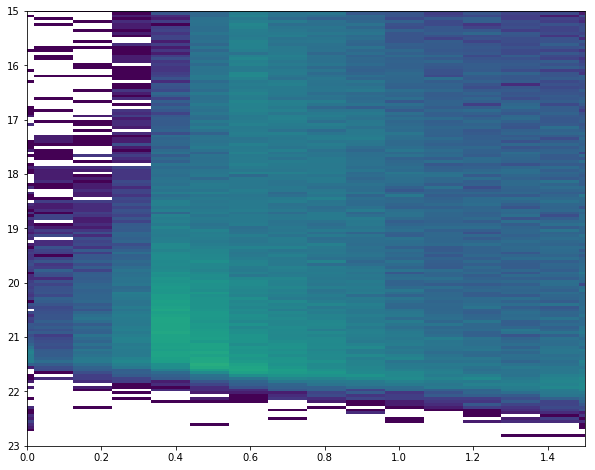

In [50]:
#---create figure-----#
fig = plt.figure(figsize=[10,8])
ax = plt.subplot(111)

#-----stats------#
N, xedges, yedges = binned_statistic_2d(g-i, r, r,
                                        'count', bins=500)

#-----plot------#
plt.imshow(np.log10(N.T), origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest')

xmin,xmax,ymin,ymax=[0,1.5,15,23]
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.gca().invert_yaxis()

In [ ]:
#---------STARS-------------#
#------------------------------------------------------------
# Plot the results using the binned_statistic function

N, xedges, yedges = binned_statistic_2d(g-i, r, rapm,
                                        'count', bins=100)
pm_median, xedges, yedges = binned_statistic_2d(, logg, count,
                                               'median', bins=100)

# Define custom colormaps: Set pixels with no sources to white
cmap = plt.cm.copper
cmap.set_bad('w', 1.)

cmap_multicolor = plt.cm.jet
cmap_multicolor.set_bad('w', 1.)

# Create figure and subplots
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(wspace=0.22, left=0.1, right=0.95,
                    bottom=0.12, top=0.95)

